In [1]:
# step 1: importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# step 2: importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')
#dataset.head()
X = dataset['Temperature'].values
y = dataset['Revenue'].values

In [11]:
# step 3: Splitting the dataset into Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)


In [21]:
print(len(X_train), len(X_test))

475 25


In [30]:
# step 4: Training the decision tree regression model on training set
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

DecisionTreeRegressor()

In [33]:
# step 5: predicting the results
y_test_pred = regressor.predict(X_test.reshape(-1,1))

In [36]:
# step 6: compare real value with predict values
data = {'Real Values':y_test, 'Predicted Values':y_test_pred}
df = pd.DataFrame(data)
df.head(3)

,Real Values,Predicted Values
0,390.403349,376.554472
1,617.100723,594.872470
2,487.706960,425.012018


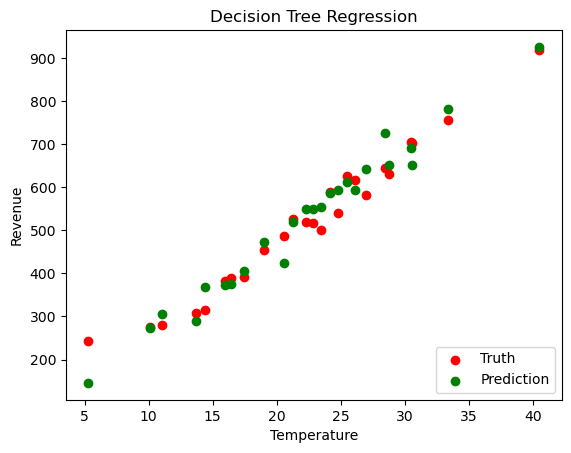

In [79]:
# step 7: visulize the results
plt.scatter(X_test, y_test, color='red', label='Truth')
plt.scatter(X_test, y_test_pred, color='green', label='Prediction')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.legend(loc="lower right") # default is loc="best" which is 'upper left', use string 'upper left', 'upper right', 'lower left'
plt.show()

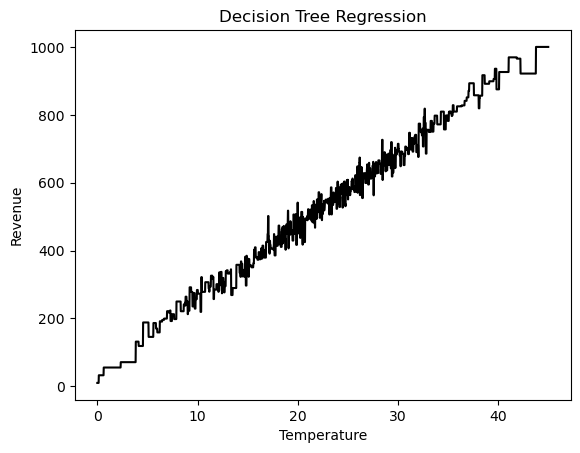

In [77]:
# visulize the decision tree regression model 
X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape(-1,1)

plt.plot(X_grid,regressor.predict(X_grid), color='black')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

In [71]:
Temp = np.array(100)
Temp = Temp.reshape(-1, 1)
Revn = regressor.predict(Temp)
print(Temp, Revn)

[[100]] [1000.]


In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#y_train_pred = regressor.predict(X_train.reshape(-1,1))
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 3.18e+01
test MSE: 1.64e+03
test R2: 0.940
